In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configration of the plot we will create

pd.options.mode.chained_assignment = None  

# Read In The Data

df = pd.read_csv(r'E:\Ahmed Saber\Portfolio Projects\Python Project\movies.csv')

In [8]:
# Lets Look at The Data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
# Lets Look For the Missing Data
# Let's loop through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [13]:
# Data Types For Our Coloumns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
# Where are null values?
print ( df.isnull() )
# How many null values are there?
df. isnull(). sum()

       name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7663  False    True  False  False     False  False  False     False   False   
7664  False    True  False  False     False  False  False     False   False   
7665  False    True  False  False     False  False  False     False   False   
7666  False    True  False  False     False   True   True     False   False   
7667  False    True  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runti

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [18]:
# Remove null values:
df. dropna( inplace = True )


In [23]:
# Now we Check
print ( df.isnull() )
# How many null values are there?
df. isnull(). sum()

       name  rating  genre   year  released  score  votes  director  writer  \
0     False   False  False  False     False  False  False     False   False   
1     False   False  False  False     False  False  False     False   False   
2     False   False  False  False     False  False  False     False   False   
3     False   False  False  False     False  False  False     False   False   
4     False   False  False  False     False  False  False     False   False   
...     ...     ...    ...    ...       ...    ...    ...       ...     ...   
7648  False   False  False  False     False  False  False     False   False   
7649  False   False  False  False     False  False  False     False   False   
7650  False   False  False  False     False  False  False     False   False   
7651  False   False  False  False     False  False  False     False   False   
7652  False   False  False  False     False  False  False     False   False   

       star  country  budget  gross  company  runti

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [24]:
# Change Data Types Of Coloumns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [51]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        Dece  
7445  2797501328         Marvel Studios    181.0        Apri  
3045  2201647264  Twentieth Century Fox    194.0        Dece  
6663  2069521700              Lucasfilm    138.0        Dece  
7244  2048359754         Marvel Studios    149.0        Apri

In [34]:
# Sorting Data By Gross
df = df.sort_values(by=['gross'],inplace= False , ascending=False)

In [30]:
# Lets Show all The Data
pd.set_option('display.max_rows',None)

In [32]:
# Lets Drop Duplicates
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

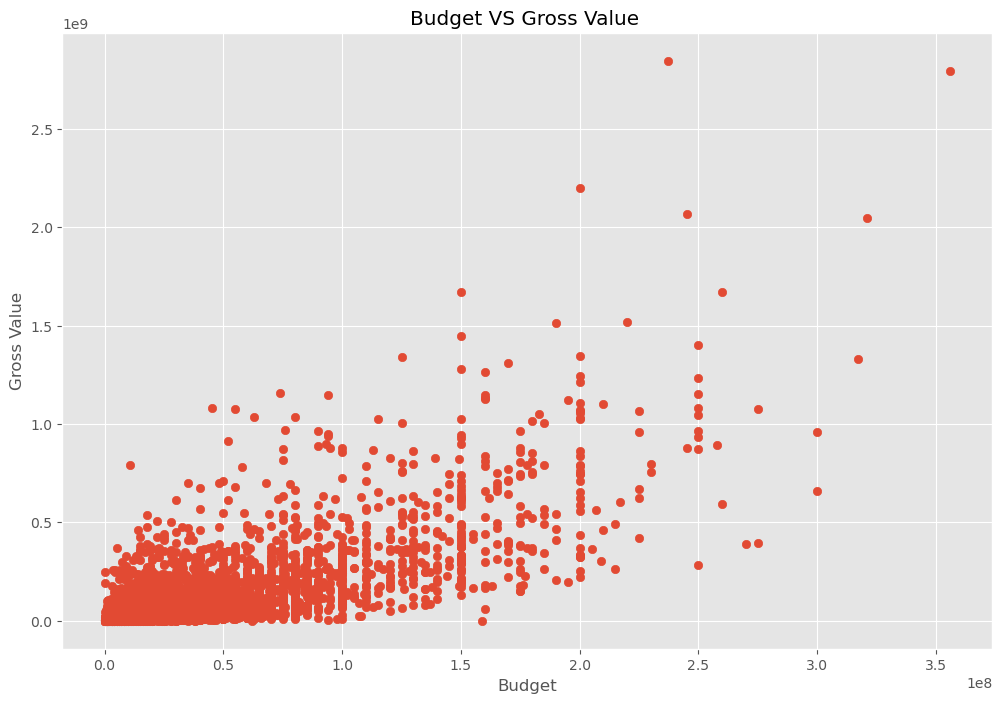

In [39]:
# Correlations Between Budget and Gross Value
# Lets Creat a Scatter Plot for Budget vs Gross Value
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gross Value ')
plt.xlabel('Budget')
plt.ylabel('Gross Value')
plt.show()



In [38]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        Dece  
7445  2797501328         Marvel Studios    181.0        Apri  
3045  2201647264  Twentieth Century Fox    194.0        Dece  
6663  2069521700              Lucasfilm    138.0        Dece  
7244  2048359754         Marvel Studios    149.0        Apri

<AxesSubplot:xlabel='gross', ylabel='budget'>

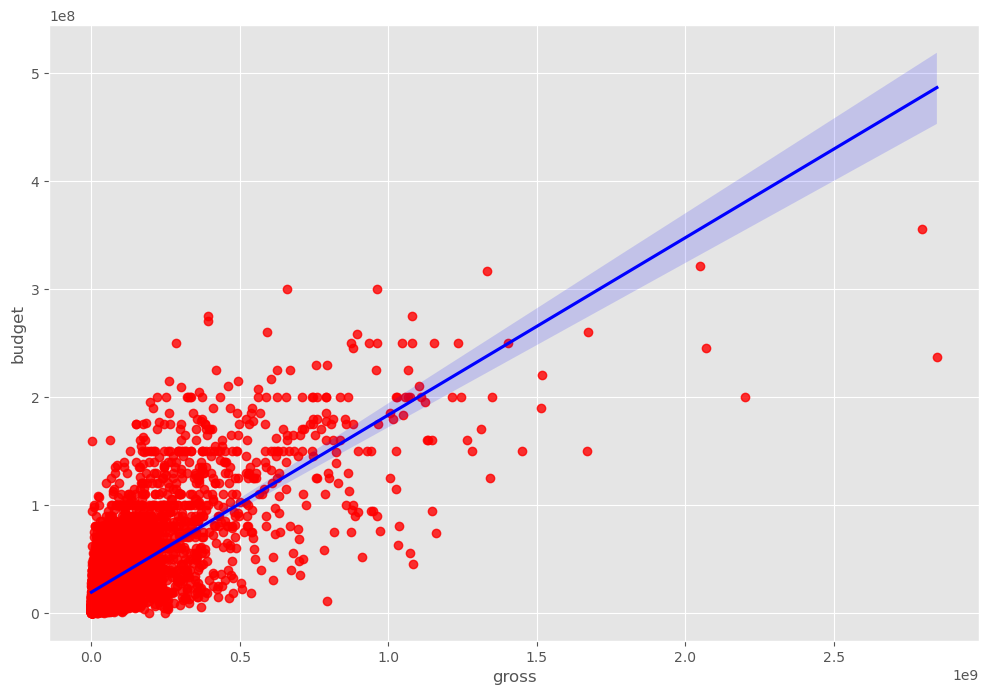

In [46]:
# Plot Budget Vs Gross Using Seaborn

sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [47]:
# Lets Start Looking at Correlation
df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [ ]:
# High Corelations beween Budget And Gross

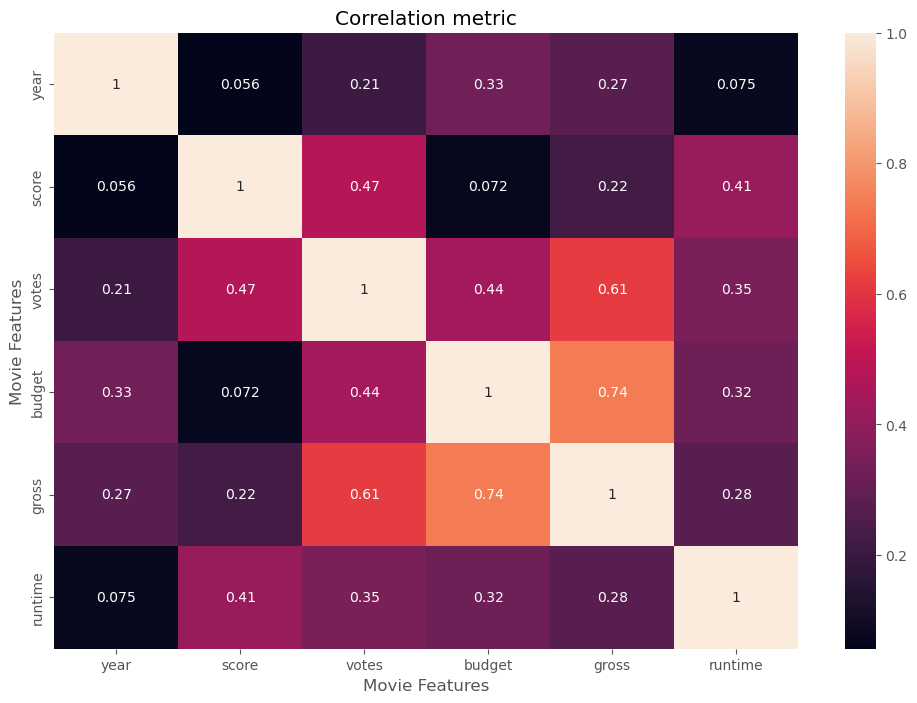

In [48]:
# Lets Creat Correlations Metric For better View
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation metric')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

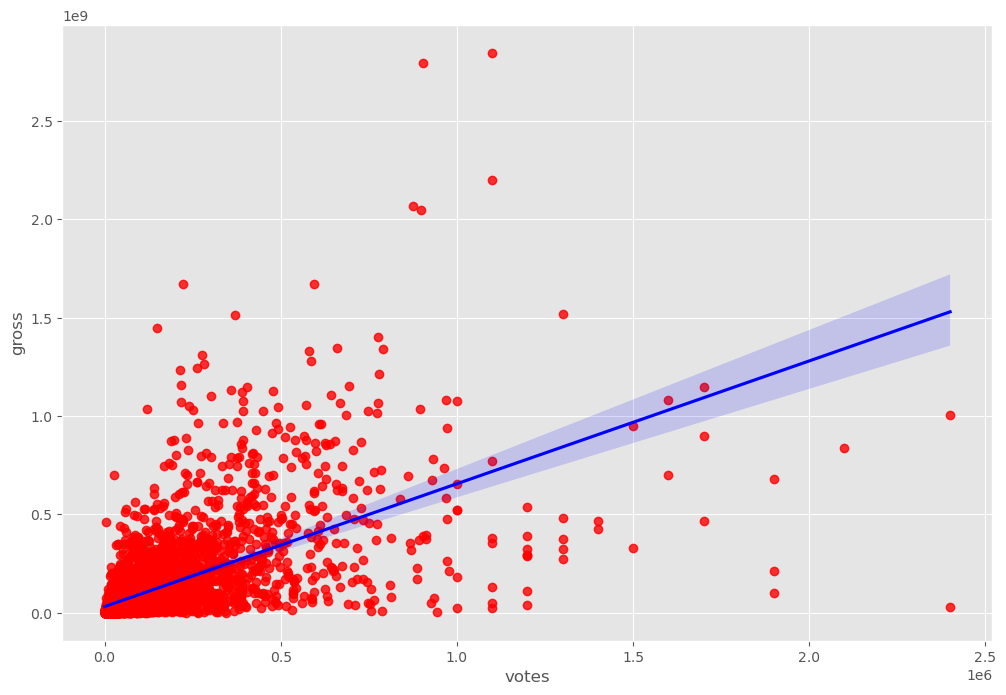

In [50]:
# Lets look At Scre Vs Gross
sns.regplot(x="votes", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [ ]:
# So WE See here that Votes And Budgets Have The Highest Coorelation with Gross